In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./iris-data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [4]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

# Standarization

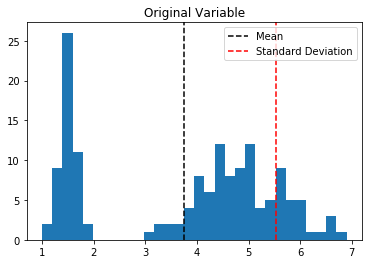

In [5]:
#Original Variable
fig, ax = plt.subplots()
ax.set_title('Original Variable')
ax.hist(y, bins = 30)

ax.axvline(x = y.mean(), color = 'black', linestyle = '--', label = 'Mean')
ax.axvline(x = y.mean()+y.std(), color = 'red', linestyle = '--', label = 'Standard Deviation')

ax.legend()

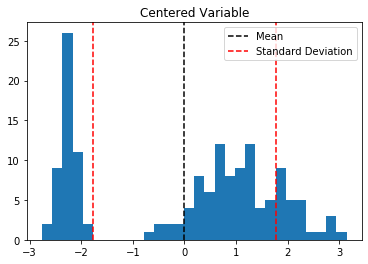

In [6]:
#Centering the variable
y_centered = y-y.mean()
fig, ax = plt.subplots()
ax.set_title('Centered Variable')
ax.hist(y_centered, bins = 30)

ax.axvline(x = y_centered.mean(), color = 'black', linestyle = '--', label = 'Mean')
ax.axvline(x = y_centered.mean() + y_centered.std(), color = 'red', linestyle = '--', label = 'Standard Deviation')
ax.axvline(x = y_centered.mean() - y_centered.std(), color = 'red', linestyle = '--')

ax.legend()

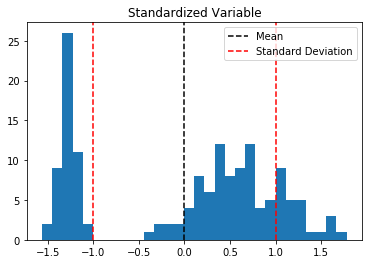

In [7]:
#Reducing the Variable
standardized_y =  y_centered /y.std()
fig, ax = plt.subplots()
ax.set_title('Standardized Variable')
ax.hist(standardized_y, bins = 30)

ax.axvline(x = standardized_y.mean(), color = 'black', linestyle = '--', label = 'Mean')
ax.axvline(x = standardized_y.mean()+standardized_y.std(), color = 'red', linestyle = '--', label = 'Standard Deviation')
ax.axvline(x = standardized_y.mean()-standardized_y.std(), color = 'red', linestyle = '--')

ax.legend()

# Covariance

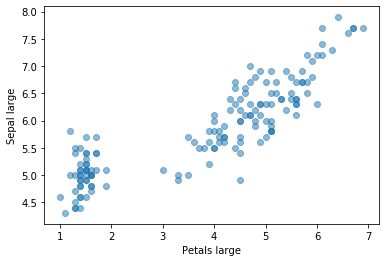

In [8]:

fig, ax = plt.subplots()
petal_large = df['lar.petalo'] 
sepal_large = df['lar.sepalo']
ax.scatter(petal_large, sepal_large, alpha = .5)
ax.set_xlabel('Petals large')
ax.set_ylabel('Sepal large')
ax.autoscale()

In [9]:
np.cov(petal_large, sepal_large)


array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

# Correlation

In [10]:
corr = df.corr(method = 'spearman')
corr

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


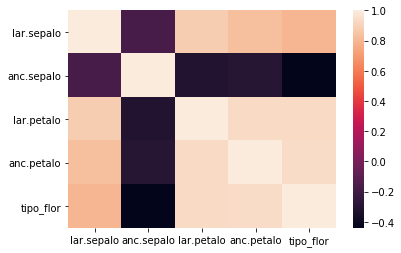

In [11]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [12]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')